### Define basic utils

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def _calc_pvalue(values, plog):
  if plog:
    values = [[np.log2(v) for v in vals] for vals in values]
  F, p = stats.f_oneway(*values)
  stds = [np.std(vals) for vals in values]
  minmax_ratio = max(stds) / min(stds)
  if minmax_ratio >= 2:
    raise Exception('Cannot compute pvalue as min-max ratio > 2 ({})'.format(minmax_ratio))
  return p


## Generate for STDP-RL

In [27]:
aggs_by_step = [[102.23, 90.82, 75.18, 98.46, 132.6, 157.13, 125.22, 146.2, 114.28, 114.79], 
 [106.09, 88.23, 79.77, 113.92, 112.66, 152.8, 112.5, 141.85, 113.04, 112.18]]
plog = False
labels = ['EA→EM plastic', 'ES→EA→EM plastic']


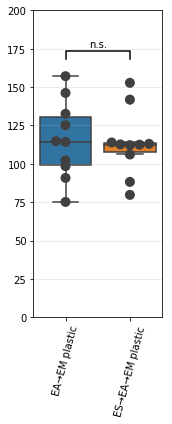

In [36]:

plt.figure(figsize=(2.5,6))
plt.grid(axis='y', alpha=0.3)
ax = sns.boxplot(data=aggs_by_step)
ax = sns.swarmplot(data=aggs_by_step, color=".25", size=10.0)
ax.set_xticklabels(labels, rotation=75)
ax.set_ylim(0, 200)

p = _calc_pvalue(aggs_by_step, plog)
pstring = ''.join(['*' for th in [0.05, 0.01, 0.005, 0.001, 0.0001] if p < th])
if pstring == '':
    pstring = 'n.s.'
maxval = max(max(aggs_by_step)) * 1.05
y, h, col = maxval * 1.05, maxval * 0.03, 'k'
x1, x2 = 0,1
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h*1.3, pstring, ha='center', va='bottom', color=col)

# plt.show()

outputfile = '../results/seedrun_m1-2022-01-16/steps_per_eps/plotE.png'
plt.tight_layout()
plt.savefig(outputfile, dpi=300)

#### Experiment with the lines between the same seeds

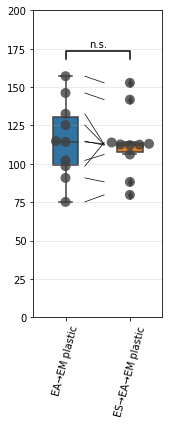

In [38]:

plt.figure(figsize=(2.5,6))
plt.grid(axis='y', alpha=0.3)
ax = sns.boxplot(data=aggs_by_step, width=0.4)
ax = sns.swarmplot(data=aggs_by_step, color=".25", size=10.0, alpha=0.8)
ax.set_xticklabels(labels, rotation=75)
ax.set_ylim(0, 200)

p = _calc_pvalue(aggs_by_step, plog)
pstring = ''.join(['*' for th in [0.05, 0.01, 0.005, 0.001, 0.0001] if p < th])
if pstring == '':
    pstring = 'n.s.'
maxval = max(max(aggs_by_step)) * 1.05
y, h, col = maxval * 1.05, maxval * 0.03, 'k'
x1, x2 = 0,1
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h*1.3, pstring, ha='center', va='bottom', color=col)

offset = 0.3
for idx,(v1,v2) in enumerate(zip(*aggs_by_step)):
    ax.plot([0.3, 0.6], [v1, v2], c='k', lw=0.7)
    

# plt.show()

outputfile = '../results/seedrun_m1-2022-01-16/steps_per_eps/plotE-wLines.png'
plt.tight_layout()
plt.savefig(outputfile, dpi=300)

# Generate for EVOL


In [21]:
aggs_by_step = [[256.8900, 166.5550, 292.0650, 269.0700, 222.4450, 82.5850, 138.2000, 78.9800, 171.8400, 117.4750],
    [497.75, 496.5, 496.75, 499.25, 490.0, 497.5, 498.0, 500.0, 499.5, 500.0]]
plog = True
labels = ['EA→EM plastic', 'ES→EA→EM plastic']


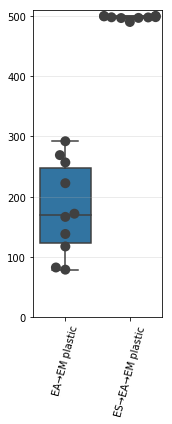

In [25]:

plt.figure(figsize=(2.5,6))
plt.grid(axis='y', alpha=0.3)
ax = sns.boxplot(data=aggs_by_step)
ax = sns.swarmplot(data=aggs_by_step, color=".25", size=10.0)
ax.set_xticklabels(labels, rotation=75)
ax.set_ylim(0, 510)

# p = _calc_pvalue(aggs_by_step, plog)
# pstring = ''.join(['*' for th in [0.05, 0.01, 0.005, 0.001, 0.0001] if p < th])
# if pstring == '':
#     pstring = 'n.s.'
# maxval = max(max(aggs_by_step)) * 1.05
# y, h, col = maxval * 1.05, maxval * 0.03, 'k'
# x1, x2 = 0,1
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax.text((x1+x2)*.5, y+h*1.3, pstring, ha='center', va='bottom', color=col)

# plt.show()

outputfile = '../results/seedrun_evol-2022-02-20/plotE.png'
plt.tight_layout()
plt.savefig(outputfile, dpi=300)